### Neural Network for Classification

Let's do a brief recap of Neural Network.

An artificial neural network is a model composed of layers of neurons. In the following implementation each neuron is modeled as a logistic unit, i.e. it computes $g(\theta^T x)$, where $g$ is a sigmoid **activation function** ( $g(z) = \frac{1}{1 + e^{-z}}$), $\theta$ is the weight vector, and $x$ is the input vector (however, in general $g$ can be any **non-linear** activation funtion).

A neural network is composed of one or more **hidden layers** and a single **output layer**. Each layer transforms its input into a new representation, passing the result to the next layer.


##### Notation
Notation that we will follow:
- $x_j$: the $j$-th input feature.
  - For example, $x_1$ is the first feature of the input $x$.
- $z_j^{[l]}$: the weighted sum computed by unit $j$ in layer $l$.
  - For example, $z_1^{[2]}$ is the weighted sum computed by the first unit in the second layer.
- $a_j^{[l]}$: the activation of unit $j$ in layer $l$.
  - For example, $a_1^{[2]}$ is the activation of the first unit in the second layer.
  - By activation, we mean the value computed and outputted by the neuron.
- $\Theta^{[l]}$: the matrix of weights controlling the function mapping from layer $l-1$ to layer $l$.
- $B^{[1]}$: the vector of bias parameters of layer $l$.


##### Forward Propagation

**Forward propagation** involves computing the network's hypothesis $h_\Theta(x)$, i.e. the ouput, by passing data through the layers from the input to the output. We saw how to do it with vectorized implementation.

For istance, in case of a simple neural network with one hidden layer and one output layer:

$$
z^{[1]} = \Theta^{[1]} a^{[0]} + B^{[1]}, \quad a^{[1]} = g(z^{[1]})
$$
$$
z^{[2]} = \Theta^{[2]} a^{[1]} + B^{[2]}, \quad h_\Theta(x) = a^{[2]} = g(z^{[2]})
$$

where we indicated with $a^{[0]}$ the input $x$.

In general, for any layer $l$:
1. Compute $z^{[l]}$:
   $$
   z^{[l]} = \Theta^{[l]} a^{[l-1]} + B^{[l]}
   $$
2. Compute activations $a^{[l]}$:
   $$
   a^{[l]} = g(z^{[l]})
   $$


##### Cost Function for Binary Classification

For binary classification, we use the **Binary Cross-Entropy (BCE)** cost function:
$$
J(\Theta, B) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log h_\Theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\Theta(x^{(i)}) ) \right] + \frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{j,v} (\Theta_{jv}^{[l]})^2
$$

Here we consider its L2 regularized version where $\lambda$ is the regularization parameter.


##### Backpropagation

**Backpropagation** computes gradients of the cost function $J(\Theta, B)$ with respect to $\Theta^{[l]}$ and $B^{[l]}$ for each layer. It involves the following steps:

**1. Forward Pass**: Perform forward propagation to compute $z^{[l]}$ and $a^{[l]}$ for all layers $l = 1, \dots, L$.

**2. Compute Error at the Output Layer**: In general the error at the output layer $L$ is given by:
   $$
   \delta^{[L]} = \frac{\partial J}{\partial z^{[L]}} = \frac{\partial J}{\partial a^{[L]}} \odot g'(z^{[L]})
   $$
   For binary classification we have:
   $$
   \delta^{[L]} = \left( -\frac{y}{a^{[L]}} + \frac{1-y}{1-a^{[L]}} \right) \odot g'(z^{[L]})
   $$
   where $y$ is the target output vector and $g'(z^{[L]}) = a^{[L]} \odot (1 - a^{[L]})$ (derivative of the sigmoid function).

**3. Backpropagate the Error**: For each hidden layer $l = L-1, \dots, 1$, compute the error:
   $$
   \delta^{[l]} = (\Theta^{[l+1]})^T \delta^{[l+1]} \odot g'(z^{[l]})
   $$

**4. Compute Gradients**: The gradients of the cost function with respect to the parameters are:
   $$
   \frac{\partial J}{\partial \Theta^{[l]}} = \delta^{[l]} (a^{[l-1]})^T + \lambda \Theta^{[l]}
   $$
   $$
   \frac{\partial J}{\partial B^{[l]}} = \delta^{[l]}
   $$
**Note**: Regularization is applied only to the weights $\Theta^{[l]}$, not to the biases $B^{[l]}$.

##### Backprop considering training set $X$
The implemntation above consider the case where we compute gradients for a single training example. In case we e compute the gradients considering  all training examples we need to slidly modify it.

In particular we saw that we can be implement this efficiently using vectorized operations.

For a dataset with $X \in \mathbb{R}^{n \times m}$ (where $n$ is the number of features and $m$ is the number of examples):
$$
Z^{[1]} = \Theta^{[1]} X + \tilde{B}^{(1)}
$$
Here we indicate with $\tilde{B}^{(1)}$ the bias vactor after **broadcasting** is applied. We recall that the bias vector $B^{[1]}$ has dimensions $d \times 1$ (where $d$ is the number of units in the layer), so like that it is not possible to perform the addition $Z^{[1]} = \Theta^{[1]} X + B^{[1]}$. Therefore, **broadcasting** is applied, which means that $B^{[1]}$ is expanded to match the shape of $\Theta^{[1]} X$, which is $d \times m$. In NumPy broadcasting is done **implicitly**. 

Given it, gradients are computed as:
$$
\frac{\partial J}{\partial \Theta^{[l]}} = \frac{1}{m} (\delta^{[l]} (A^{[l-1]})^T + \lambda \Theta^{[l]}) 
$$
$$
\frac{\partial J}{\partial B^{[l]}} = \frac{1}{m} \delta^{[l]}
$$


##### Parameter Updates

Finally, update parameters for each layer using the gradient descent rule.
$$
\Theta^{[l]} := \Theta^{[l]} - \alpha \frac{\partial J}{\partial \Theta^{[l]}}
$$
$$
B^{[l]} := B^{[l]} - \alpha \frac{\partial J}{\partial B^{[l]}}
$$
where $\alpha$ is the learning rate.

---

##### Notes on Input and Output Shapes

In practice:
- $X$ is often structured as $m \times n$, with examples as rows and features as columns. To match the derivation here, transpose $X$ (use $X^T$) to $n \times m$ for computation.
- Similarly, $y$ (which is $m \times 1$) should also be transposed, resulting in $y^T$ with shape $1 \times m$ (output labels as a single row, one per example).

This ensures proper alignment with the derivation done so far.

Moreover, in this code implementation we will indicate $ \Theta^{[l]} $ with $ W^{[l]} $, $ \delta^{[l]}=\frac{\partial J}{\partial Z^{[L]}} $ with $ dZ^{[l]} $ and $ \frac{\partial J}{\partial A^{[L]}} $ with $ dA^{[l]} $.


In [43]:
import numpy as np
import pandas as pd

from scratch_libraries.classification_nn import NeuralNetwork

In [44]:
df = pd.read_csv('./datasets/diabetes.csv')

In [45]:
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [47]:
features_names, label_name = df.columns[:-1], df.columns[-1]

x = df[features_names].values
y = df[label_name].values

In [48]:
print("Before: ", y.shape)

# I suggest you to always specify the dimensions of vectors, to avoid errors
y = y.reshape(-1, 1)

print("After: ", y.shape)

Before:  (768,)
After:  (768, 1)


In [49]:
train_index = round(len(x) * 0.8)

x_train = x[:train_index]
y_train = y[:train_index]
x_test = x[train_index:]
y_test = y[train_index:]

In [50]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [51]:
print(x_train[1])

[-0.53648284 -0.26510643  0.30607252  0.71924985 -0.69533031  0.46374943
 -0.97312963 -1.03578012]


In [52]:
nn = NeuralNetwork(layers=[x.shape[1], 12, 12, 1], lmd=0.01)
nn.fit(x_train, y_train)

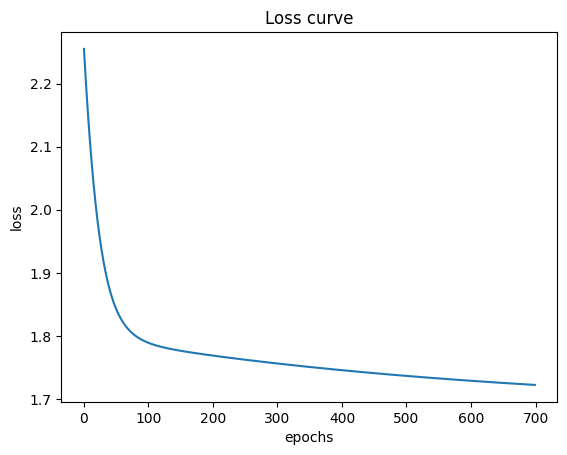

In [53]:
nn.plot_loss()

In [54]:
preds = nn.predict(x_test)
print(preds)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [55]:
print(preds.shape)

(154, 1)


In [56]:
print(y_test.shape)

(154, 1)


In [57]:
print(nn.compute_performance(preds, y_test))

{'confusion_matrix': array([[92,  4],
       [36, 22]]), 'accuracy': 0.7402597402597403, 'error_rate': 0.2597402597402597, 'precision': 0.8461538461538461, 'recall': 0.3793103448275862, 'fn_rate': 0.6206896551724138, 'specificity': 0.9583333333333334, 'fp_rate': 0.04166666666666663, 'f1_score': 0.5238095238095238}
